# Title

**Linear Support Vector Machines**

# Description

The goal of the exercise is to perform classification predictions on a linear SVM model .

# Instructions: 
- In the first part, we are trying to draw the separating hyperplane and margins for two different regularization parameter values.
- We are trying to predict who will have AHD based on Age and MaxHAR. To do so we need to:
- Read the `Heart.csv` as a data frame and split into train and test.
- Assign the predictor and response variables.
- Fit logistic regression and Linear SVM models and interpret results
- Plot the classification boundaries against the two predictors


# Hints:
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC" target="_blank">sklearn.SVM()</a> : Generates a Support Vector Machine classifier

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.fit" target="_blank">sklearn.svm.SVC.fit()</a> : Fits the model to the given data

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.predict" target="_blank">sklearn.svm.SVM.predict()</a> : Predict using the estimated model  to perform pure classification predictions

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.predict_proba" target="_blank">sklearn.svc.SVM().predict_proba()</a> : Predict using the estimated model to perform probability predictions of all the classes in the response (they should add up to 1 for each observation)

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.coef_" target="_blank">sklearn.svm.SVC().coef_ and .intercept_</a> : Pull off the estimated $\beta$ coefficients in a SVC model


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

In [13]:
# Create a toy dataset using sklearn.datasets.make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
#amplify the first feature (X[:,0]) to demonstrate the model predictions better
X[:, 0] *= 1.5

**Q1.1** Below we fit an svm with linear kernel.  We print out the coefficient estimates.

In [5]:

# fit the model
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

print(clf.coef_)
print(clf.intercept_)


[[ 0.22967329 -1.37758262]]
[3.18971354]


Form of equation defining the decision surface separating the classes is a hyperplane of the form:

w0 + w1*x1 + w2*x2=0 (H0), where w0 is the y-intercept and w1 and w2 are the model coefficients (w=[w1 w2]) for 
the two features x1 and x2.

All the data points where  w0 + w1*x1 + w2*x2>=1 (H1) will be classified as Class 1 and

All the data points where  w0 + w1*x1 + w2*x2<=-1 (H2) will be classified as Class 2.

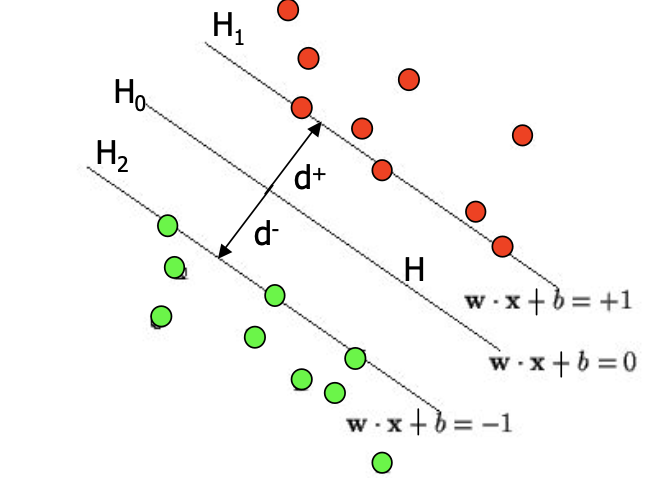

As seen in the figure above, there are three lines:

The line in the middle is the separating hyperplane
the lines above and below this hyperplane are marking the margins.

Margin of Separation (d) is the separation between the hyperplane and 
the closest data point for a given weight vector w and bias w0.

Aw we reorganize ther equation for H0, we find the slope of the separating hyperplane, which is the variable 'a':
w2*x2=-w1*x1-w0

a=-w1/w2

The margin, d, which is the shortest distance between H0 and H1 is:

$d = \frac{1}{\sqrt{w_1^2+w2^2}}$

Given the margin d and the equation for H0, we can find the equations for H1 and H2 as:

$H1= H0+\sqrt{1+a^2}*d$

$H2= H0-\sqrt{1+a^2}*d$

In [ ]:
# We are now going to find the separating hyperplane H0, and the margin lines H1 and H2

Text(0.5, 1.0, 'C=1')

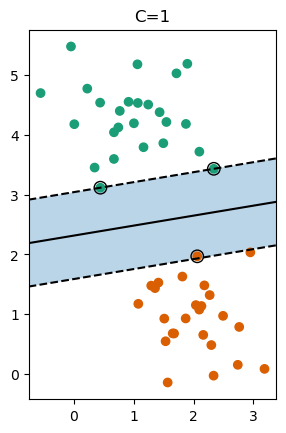

In [6]:
# get the separating hyperplane
w = clf.coef_[0]
w1=w[0]
w2=w[1]
w0=clf.intercept_[0]

a = -w1 / w2
xx = np.linspace(X[:, 0].min() - .2, X[:, 0].max() + .2)
yy = a * xx - (w0) / w2

# plot the parallels to the separating hyperplane that pass through the
# support vectors
margin = 1 / np.sqrt(w1**2 + w2**2)
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin


# plot the line, the points, and the nearest vectors to the plane
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.fill_between(xx, yy_down, yy_up, alpha=.3)
plt.scatter(X[:, 0], X[:, 1], c=plt.cm.Dark2(y))
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=80, facecolors='none', edgecolor='k')
plt.gca().set_aspect("equal")
plt.xlim(xx[0], xx[-1])
plt.title("C=1")

**Q1.2** Now repeat the same procedure for C=0.1.

In [5]:
# fit the model
clf = svm.SVC(kernel='linear', C=_________)

# get the separating hyperplane
w = clf._____
w1=____
w2=____
w0=clf.____

a = _______
xx = np.linspace(X[:, 0].min() - .2, X[:, 0].max() + .2)
yy = ___________

# plot the parallels to the separating hyperplane that pass through the
# support vectors
margin = _________
yy_down = _________
yy_up = __________


# plot the line, the points, and the nearest vectors to the plane
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.fill_between(xx, yy_down, yy_up, alpha=.3)
plt.scatter(X[:, 0], X[:, 1], c=plt.cm.Dark2(y))
plt.scatter(______________, _________________,
            s=80, facecolors='none', edgecolor='k')
plt.gca().set_aspect("equal")
plt.xlim(xx[0], xx[-1])
plt.title(_______)

**Q2** Evaluate the models based on misclassification rate for both Logistic Regression and Linear SVM. 

In [7]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

In [9]:
heart = pd.read_csv('Heart.csv')

# Force the response into a binary indicator:
heart['AHD'] = 1*(heart['AHD'] == "Yes")

print(heart.shape)
#heart.head()
heart.describe()

(303, 15)


,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,303.000000
mean,152.000000,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,0.458746
std,87.612784,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,0.499120
min,1.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,76.500000,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,152.000000,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,0.000000
75%,227.500000,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,1.000000
max,303.000000,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


In [10]:
heart_train, heart_test = train_test_split(heart, test_size=0.3, random_state = 109)

**Q2.1** 
- Below we fit an unregularized logistic regression model (`logit1`) to predict `AHD` from `Age` and `MaxHR` in the training set (with `penalty='none'`).  
- Print out the coefficient estimates, and interpret general trends.
- Fit an unregularized linear SVM model (`svm1`) to predict `AHD` from `Age` and `MaxHR` in the training set.  
- Print out the coefficient estimates

In [4]:
degree = 1
predictors = ['Age','MaxHR']

X_train1 = PolynomialFeatures(degree=degree,include_bias=False).fit_transform(heart_train[predictors])
y_train = heart_train['AHD']


logit1 = LogisticRegression(max_iter = 5000).fit(___________)

print("Logistic Regression Estimated Betas:",
      __________,___________)


Logistic Regression Estimated Betas: [4.32595765] [[ 0.02584719 -0.03884729]]


In [ ]:
# fit the model
# fit the model
from sklearn.svm import LinearSVC
svm1 = LinearSVC(dual='auto')
svm1.fit(________)

print("Linear SVM classifier Estimated Betas:",
      __________,___________)


**Q1.3.** The code below performs the classification predictions for the model at all values in the range of the two predictors for `logit1`.  Then the predictions and the train dataset are added to a scatterplot in the second code chunk:

In [ ]:
n = 100

x1=np.linspace(np.min(heart[['Age']]),np.max(heart[['Age']]),n)
x2=np.linspace(np.min(heart[['MaxHR']]),np.max(heart[['MaxHR']]),n)
x1v, x2v = np.meshgrid(x1, x2)

# This is how we would typically do the prediction (have a vector of yhats)
#yhat10 = knn10.predict(np.array([x1v.flatten(),x2v.flatten()]).reshape(-1,2))

# To do the predictions and keep the yhats on 2-D (to match the dummy predictor shapes), use this
X = np.c_[x1v.ravel(), x2v.ravel()]
X_dummy = PolynomialFeatures(degree=1,include_bias=False).fit_transform(X)





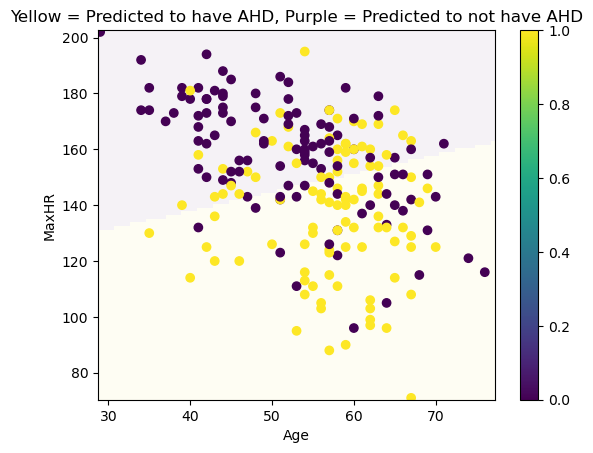

In [9]:
yhat1 = logit1.predict(X_dummy)
plt.pcolormesh(x1v, x2v, yhat1.reshape(x1v.shape),alpha = 0.05) 
plt.scatter(heart_train['Age'],heart_train['MaxHR'],c=heart_train['AHD'])
plt.ylabel("MaxHR")
plt.xlabel("Age")
plt.title("Logistic Regression: Yellow = Predicted to have AHD, Purple = Predicted to not have AHD")
plt.colorbar()
plt.show()

In [ ]:
yhat2 = svm1.predict()
plt.pcolormesh(x1v, x2v, ___________,alpha = 0.05) 
plt.scatter(heart_train['Age'],heart_train['MaxHR'],c=heart_train['AHD'])
plt.ylabel("MaxHR")
plt.xlabel("Age")
plt.title("SVM: Yellow = Predicted to have AHD, Purple = Predicted to not have AHD")
plt.colorbar()
plt.show()